# Домашнее задание

**Компании заинтересованы в ответах на два вопроса:**

1. Будет ли кампания успешной?
2. Если кампания была успешной, насколько этот успех можно объяснить рекламой?

Чтобы ответить на второй вопрос, мы обычно проводим A/B тестирование.

Большинство людей будут видеть рекламу (экспериментальная группа). А небольшая часть людей (контрольная группа) вместо этого увидит объявление государственной службы (PSA) (или ничего) точно такого же размера и в том же месте, где обычно находится реклама.

## Словарь данных:

- **user id**: Идентификатор пользователя (уникальный).
- **test group**: Если "ad", то человек видел рекламу, если "psa", то он видел только объявление государственной службы.
- **converted**: Если человек купил продукт, то True, иначе False.
- **total ads**: Количество рекламы, увиденной человеком.
- **most ads day**: День, в который человек увидел наибольшее количество рекламы.
- **most ads hour**: Час дня, в который человек увидел наибольшее количество рекламы.

### Проанализируйте структуру данных и проведите их предобработку

- Исследуйте структуру данных;
- Преобразуйте столбцы к необходимым типам данных.
- Проверьте данные на наличие пропусков и избавьтесь от них, если нужно.
- Проверьте, есть ли пользователи, которые в процессе A/B теста попали в обе группы. Если да, исключите пользователей, оказавшихся в обеих группах.

### Сделайте первичный анализ результатов A/B-тестирования

1. Рассчитайте вспомогательные показатели для контрольной и тестовой групп:
   - количество посещений сайта;
   - суммарное количество совершённых покупок;

   Сделайте промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной страницы? Можно ли говорить о сбалансированности выборок?

2. В каждой из групп рассчитайте ключевые показатели:
   - конверсия;
   - среднее количество рекламы, увиденной пользователем.

   Сделайте первичные выводы о результатах A/B-тестирования на основе показателей конверсии и среднего количества увиденной рекламы в каждой из групп. По какому(-им) показателю(-ям), на первый взгляд, вариант А эффективнее варианта B и наоборот?

### Проведите статистический анализ результатов A/B-тестирования

1. Сформулируйте статистические гипотезы, соответствующие поставленным бизнес-вопросам, и выберите статистический тест для их проверки.  
   Не забудьте проверить данные на нормальность там, где это необходимо.

2. С помощью аппарата статистических тестов определите:
   - Есть ли статистическая разница между конверсиями в группах А и B?
   - Есть ли статистическая разница между средними количествами увиденной рекламы в группах А и B?

3. Подкрепите результаты статистических тестов, построив 95 % доверительные интервалы для:
   - конверсий в каждой из групп;
   - разницы конверсий в группах;
   - среднего количества увиденной рекламы в группах А и B.

4. Проинтерпретируйте построенные доверительные интервалы для конверсий и среднего количества увиденной рекламы группах. Есть ли перекрытие между доверительными интервалами для групп? Если есть, то о чём это говорит?

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, shapiro

In [176]:
df = pd.read_csv('marketing_AB.csv')
df 

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


### **Анализ структуру данных и проведения их предобработки**  

In [177]:
df.info(), df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


(None,
 Unnamed: 0       588101
 user id          588101
 test group            2
 converted             2
 total ads           807
 most ads day          7
 most ads hour        24
 dtype: int64)

В дата сеть не обнаружено пропусков. Нет необходимости проводить действия для удаления пропусков, судя по дата сету нет необходимости уделять пользователей которые попали в две группы. Так как в дата сете уникальных "user id" пользователей столько же сколько уникальных записей, из этого следует в данном наборе данные нет такие. Но сделать это было бы возможно по средствам  группировки по user id и проверяем количество уникальных test group `nunique`. И найти пользователей которые есть в обеих группах `df.index.tolist()` Далее удалям пользователей которые есть в обоих гриппах 

### **Первичный анализ результатов A/B-тестирования**  

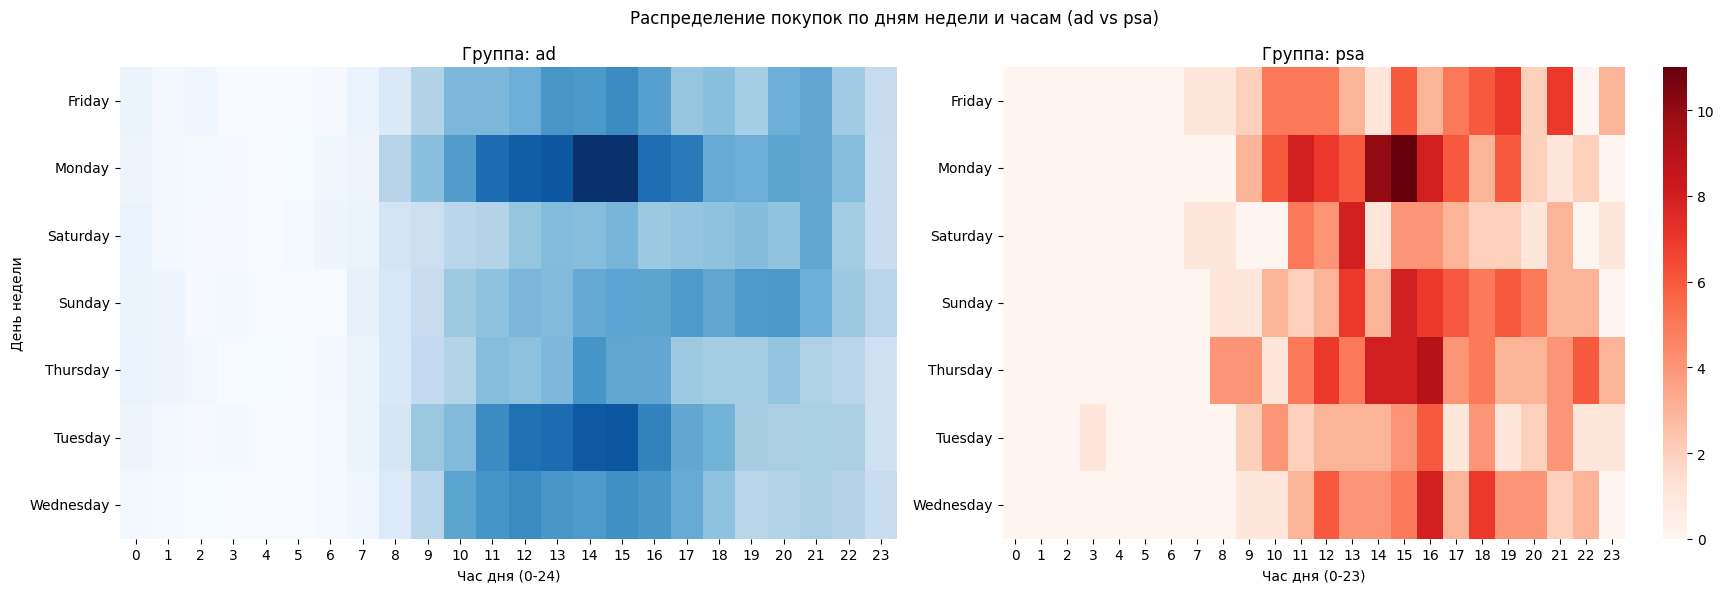

In [178]:
# Фильтруем данные по группам
ad_data = df[df['test group'] == 'ad']
psa_data = df[df['test group'] == 'psa']

# Строим две тепловые карты рядом
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(
    ad_data.pivot_table(index='most ads day', columns='most ads hour', aggfunc='sum', values='converted',  fill_value=0),
    cmap='Blues', ax=ax1, cbar=False
)
ax1.set_title('Группа: ad')
ax1.set_xlabel('Час дня (0-24)')
ax1.set_ylabel('День недели')

sns.heatmap(
    psa_data.pivot_table(index='most ads day', columns='most ads hour', aggfunc='sum', values='converted', fill_value=0),
    cmap='Reds', ax=ax2
)
ax2.set_title('Группа: psa')
ax2.set_xlabel('Час дня (0-23)')
ax2.set_ylabel('')

plt.suptitle('Распределение покупок по дням недели и часам (ad vs psa)')
plt.tight_layout()
plt.show()

In [179]:
visits_by_group = df['test group'].value_counts()
visits_by_group
print("Количество посещений по группам:", visits_by_group, sep=' ')
visits_proportion = visits_by_group /  visits_by_group.sum() * 100
print("Пропорция посещений по группам (%):", visits_proportion.round(1), sep=' ')

Количество посещений по группам: test group
ad     564577
psa     23524
Name: count, dtype: int64
Пропорция посещений по группам (%): test group
ad     96.0
psa     4.0
Name: count, dtype: float64


In [180]:
converted_by_group = df.groupby('test group')['converted'].sum()
print("Совершённые покупки по группам:", converted_by_group, sep=' ')
converted_by_group_proportion = converted_by_group /  converted_by_group.sum() * 100
print("Пропорция покупки по группам (%):", converted_by_group_proportion.round(1), sep=' ')
total_ads_by_group = df.groupby('test group')['total ads'].sum()
print("Показы рекламы по группам:", total_ads_by_group, sep=' ')
total_ads_by_group_proportion = total_ads_by_group /  total_ads_by_group.sum() * 100
print("Пропорция показы рекламы по группам (%):", total_ads_by_group_proportion.round(1), sep=' ')

Совершённые покупки по группам: test group
ad     14423
psa      420
Name: converted, dtype: int64
Пропорция покупки по группам (%): test group
ad     97.2
psa     2.8
Name: converted, dtype: float64
Показы рекламы по группам: test group
ad     14014701
psa      582481
Name: total ads, dtype: int64
Пропорция показы рекламы по группам (%): test group
ad     96.0
psa     4.0
Name: total ads, dtype: float64


In [181]:
ab_test_metrics = pd.DataFrame({
    'visits': visits_by_group,
    'visits_proportion': visits_proportion.round(1),
    'converted': converted_by_group,
    'converted_proportion': converted_by_group_proportion,
    'conversion Rate': converted_by_group / visits_by_group,
    'total_ads': total_ads_by_group,
    'total_ads_proportion': total_ads_by_group_proportion
})
ab_test_metrics

,visits,visits_proportion,converted,converted_proportion,conversion Rate,total_ads,total_ads_proportion
test group,,,,,,,
ad,564577,96.0,14423,97.170383,0.025547,14014701,96.009634
psa,23524,4.0,420,2.829617,0.017854,582481,3.990366


### Вывод по полученным данным
 <!-- использовать .   -->
#### **1. Сопоставимость количества посещений**

Количество посещений **крайне несопоставимо** — группа `ad` получила в **24 раза больше трафика**, чем `psa`.  
→ Это **серьёзный дисбаланс**, который ставит под сомнение корректность сравнения групп. Рекомендуется использовать методы коррекции (стратификация, CUPED)

---

#### **2. Анализ конверсии (несмотря на дисбаланс)**
- **Конверсия `ad`:** 2.55%  
- **Конверсия `psa`:** 1.79%  

**Разница:** +0.76 процентных пункта (относительный прирост +42.5%).  

**Возможные проблемы**, из-за дисбаланса в трафике:    
- Группа `ad` могла получить более "качественных" пользователей.  
- Разница может быть статистически незначимой при таком соотношении выборок.  


На основе тепловых карт для групп ad и psa можно сделать следующие наблюдения. Общий паттерн поведения пользователей в обеих группах выглядит схожим - пики покупок приходятся на одинаковые дни недели и часы. Это говорит о том, что в целом пользователи ведут себя похожим образом независимо от группы. Однако между группами есть заметные различия в интенсивности покупок в определенные периоды времени. Эти различия указывают на неоднородность данных между группами.

### **Проведения статистического анализ результатов A/B-тестирования**  

**Формулируем статистическую гипотезу**

- **Нулевая гипотеза (H0):**  
  Нет разницы в конверсии между группами  

- **Альтернативная гипотеза (H1):**  
  Есть статистически значимая разница между группами


Для проверки распределения используем test group, поскольку в нём представлены дискретные значения, и распределение в этом случае более наглядно. Я также проверил распределение для converted — оно также не является нормальным.

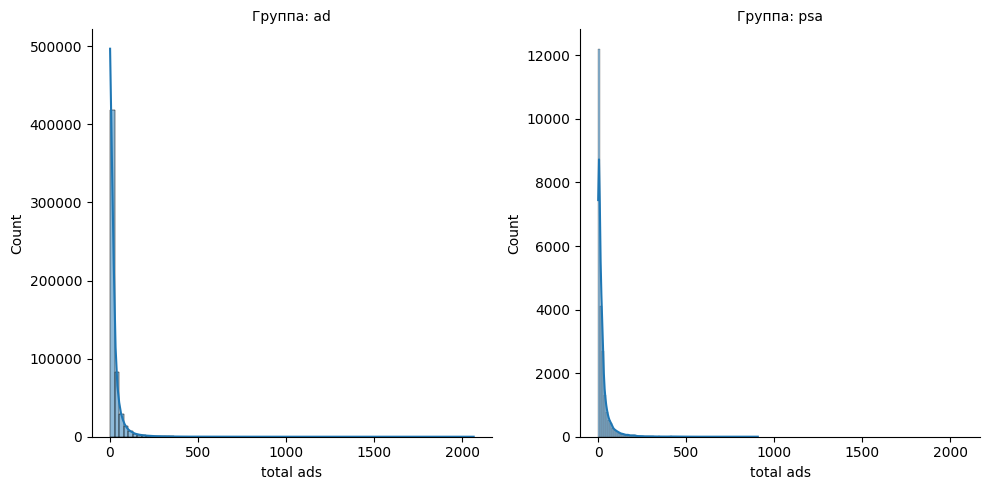

In [185]:
g = sns.FacetGrid(df, col='test group', height=5, sharey=False)
g.map_dataframe(sns.histplot, x='total ads', bins=80, kde=True)
g.set_titles('Группа: {col_name}')
plt.show()

In [188]:
alpha = 0.05

stats_x, p_value_x = stats.shapiro(df['total ads'])
print(f'Для total ads: статистика = {stats_x}, p-value = {p_value_x}')

# Принятие решения на основе p-значения
if p_value_x < alpha:
    print("Выборка total ads не нормальна")
else:
    print("Нельзя отклонить нулевую гипотезу о нормальности для ")

Для total ads: статистика = 0.4801062979273719, p-value = 8.01101062764243e-204
Выборка total ads не нормальна


In [204]:
group_ad = df[df['test group'] == 'ad']
group_psa = df[df['test group'] == 'psa']

# Тест для конверсии
stat, p_value = mannwhitneyu(group_ad['converted'], group_psa['converted'], alternative='two-sided')
print(f"Результат теста для конверсии: p-value = {p_value}")

if p_value < alpha:
    print(f"Отвергаем H0 (p < {alpha})")
    print(f"Вывод: Группа 'ad' имеет статистически значимо конверсию")
else:
    print(f"Не отвергаем H0 (p ≥ {alpha})")
    print("Вывод: Статистически значимой разницы в конверсии между группами нет")

# Тест для количества рекламы
stat, p_value = mannwhitneyu(group_ad['total ads'], group_psa['total ads'], alternative='two-sided')
print(f"\nРезультат теста для количества рекламы: p-value = {p_value}")

if p_value < alpha:
    print(f"Отвергаем H0 (p < {alpha})")
    print(f"Вывод: Группа 'ad' видела статистически значимо количество увиденной рекламы")
else:
    print(f"Не отвергаем H0 (p ≥ {alpha})")
    print("Вывод: Статистически значимой разницы в количестве увиденной рекламы нет")

Результат теста для конверсии: p-value = 1.7053617930171878e-13
Отвергаем H0 (p < 0.05)
Вывод: Группа 'ad' имеет статистически значимо конверсию

Результат теста для количества рекламы: p-value = 4.6909108547205694e-11
Отвергаем H0 (p < 0.05)
Вывод: Группа 'ad' видела статистически значимо количество увиденной рекламы


In [206]:

# Расчет доверительных интервалов для конверсий
conv_ad = group_ad['converted']
conv_psa = group_psa['converted']

ci_ad = stats.norm.interval(1 - alpha, loc=conv_ad.mean(), scale=conv_ad.sem())
ci_psa = stats.norm.interval(1 - alpha, loc=conv_psa.mean(), scale=conv_psa.sem())
ci_diff = stats.norm.interval(1 - alpha, 
                            loc=conv_ad.mean() - conv_psa.mean(),
                            scale=np.sqrt(conv_ad.sem()**2 + conv_psa.sem()**2))

print("\nДоверительные интервалы для конверсий:")
print(f"Группа ad: [{ci_ad[0]:.4f}, {ci_ad[1]:.4f}]")
print(f"Группа psa: [{ci_psa[0]:.4f}, {ci_psa[1]:.4f}]")
print(f"Разница конверсий (ad - psa): [{ci_diff[0]:.4f}, {ci_diff[1]:.4f}]")

# Расчет доверительных интервалов для количества рекламы
ads_ad = group_ad['total ads']
ads_psa = group_psa['total ads']

ci_ads_ad = stats.norm.interval(1 - alpha, loc=ads_ad.mean(), scale=ads_ad.sem())
ci_ads_psa = stats.norm.interval(1 - alpha, loc=ads_psa.mean(), scale=ads_psa.sem())

print("\nДоверительные интервалы для количества рекламы:")
print(f"Группа ad: [{ci_ads_ad[0]:.4f}, {ci_ads_ad[1]:.4f}]")
print(f"Группа psa: [{ci_ads_psa[0]:.4f}, {ci_ads_psa[1]:.4f}]")

# Проверка перекрытия доверительных интервалов
overlap_conv = (ci_ad[1] > ci_psa[0]) and (ci_psa[1] > ci_ad[0])
overlap_ads = (ci_ads_ad[1] > ci_ads_psa[0]) and (ci_ads_psa[1] > ci_ads_ad[0])

print("\nИнтерпретация:")
print(f"1. Конверсия: {'Есть перекрытие ДИ' if overlap_conv else 'Нет перекрытия ДИ'}")
print(f"2. Количество рекламы: {'Есть перекрытие ДИ' if overlap_ads else 'Нет перекрытия ДИ'}")

if overlap_conv:
    print("   - Перекрытие ДИ для конверсий может указывать на отсутствие статистически значимой разницы")
else:
    print("   - Отсутствие перекрытия ДИ для конверсий подтверждает статистически значимую разницу")

if overlap_ads:
    print("   - Перекрытие ДИ для количества рекламы может указывать на отсутствие статистически значимой разницы")
else:
    print("   - Отсутствие перекрытия ДИ подтверждает статистически значимую разницу в количестве рекламы")


Доверительные интервалы для конверсий:
Группа ad: [0.0251, 0.0260]
Группа psa: [0.0162, 0.0195]
Разница конверсий (ad - psa): [0.0060, 0.0094]

Доверительные интервалы для количества рекламы:
Группа ad: [24.7092, 24.9375]
Группа psa: [24.2134, 25.3088]

Интерпретация:
1. Конверсия: Нет перекрытия ДИ
2. Количество рекламы: Есть перекрытие ДИ
   - Отсутствие перекрытия ДИ для конверсий подтверждает статистически значимую разницу
   - Перекрытие ДИ для количества рекламы может указывать на отсутствие статистически значимой разницы
